In [7]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit 
from qiskit.quantum_info.operators import Operator
from qiskit_aer import AerSimulator
import numpy as np
import scipy.linalg as la

In [8]:
vals = {
    0: .1,
    1: .2,
    2: .3,
    63: .4
}
max_val = max(vals.keys())
nbits = len(bin(max_val)) - 2
print(nbits)

6


In [9]:
qreg_q = QuantumRegister(nbits, 'q')
qc = QuantumCircuit(qreg_q)

In [10]:
def unitary_from_column(column_vector):
    """
    Constructs a unitary matrix with the given column vector as the first column.
    
    Args:
        column_vector (numpy.ndarray): A column vector.
        
    Returns:
        numpy.ndarray: A unitary matrix with the given column vector as the first column.
    """
    n = len(column_vector)
    
    # Normalize the column vector
    u1 = column_vector / np.linalg.norm(column_vector)
    
    # Initialize the unitary matrix with the first column
    unitary_matrix = np.array([u1]).T
    
    # Construct the remaining columns using the Gram-Schmidt process
    for j in range(1, n):
        v = np.random.randn(n)  # Start with a random vector
        for i in range(j):
            proj = np.dot(unitary_matrix[:, i], v) * unitary_matrix[:, i]
            v = v - proj
        uj = v / np.linalg.norm(v)
        unitary_matrix = np.c_[unitary_matrix, uj]
    
    return unitary_matrix

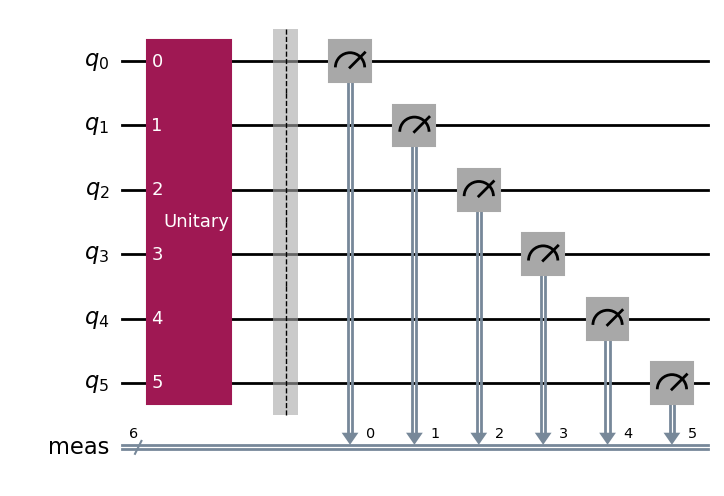

In [11]:
v = np.array([np.sqrt(vals.get(i, 0)) for i in range(2**nbits)])
unitary = unitary_from_column(v)
op = Operator(unitary)
qc.append(op, qreg_q)
qc.measure_all()
qc.draw()

In [32]:
aer = AerSimulator()
shots = 8192
counts = aer.run(qc, shots=shots).result().get_counts()
dict(counts)
for k, v in counts.items():
    print(int(k, 2), v/shots)

63 0.3997802734375
1 0.2030029296875
0 0.099365234375
2 0.2978515625
